Descargar dataset

In [1]:
!wget http://files.grouplens.org/datasets/movielens/ml-1m.zip

--2025-11-03 10:16:34--  http://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.grouplens.org/datasets/movielens/ml-1m.zip [following]
--2025-11-03 10:16:34--  https://files.grouplens.org/datasets/movielens/ml-1m.zip
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  24.4MB/s    in 0.2s    

2025-11-03 10:16:35 (24.4 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]



In [2]:
import zipfile

zip_file_path = 'ml-1m.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
import pandas as pd



In [4]:
ratings_df.count()

NameError: name 'ratings_df' is not defined

In [5]:
import pandas as pd

ratings_df = pd.read_csv('ml-1m/ratings.dat', sep='::', names=['user_id', 'item_id', 'rating', 'timestamp'], engine='python')

movies_df = pd.read_csv('ml-1m/movies.dat', sep='::', encoding='latin-1', names=['item_id', 'title', 'genres'], engine='python')
item_genre_dict = {}
for index, row in movies_df.iterrows():
  item_id = row['item_id']
  genres = row['genres'].split('|') if pd.notna(row['genres']) else []
  item_genre_dict[item_id] = genres

users_df = pd.read_csv('ml-1m/users.dat', sep='::', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])






/tmp/ipython-input-4080818614.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_df = pd.read_csv('ml-1m/users.dat', sep='::', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])


In [11]:

print("Columns in movies_df:")
print(movies_df.columns.tolist())

display(ratings_df.head())
display(movies_df.head())
display(users_df.head())

Columns in movies_df:
['item_id', 'title', 'genres']


,user_id,item_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,item_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


,user_id,age,gender,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


## Analyze the data

### Subtask:
Perform exploratory data analysis to understand the dataset's structure and content.


**Reasoning**:
Print the shape, info, describe, and missing values for each dataframe to understand their structure and content as requested by the instructions.



In [12]:
print("Ratings DataFrame Info:")
print(ratings_df.shape)
ratings_df.info()
print("\nRatings DataFrame Descriptive Statistics:")
display(ratings_df.describe())
print("\nRatings DataFrame Missing Values:")
print(ratings_df.isnull().sum())

print("\nMovies DataFrame Info:")
print(movies_df.shape)
movies_df.info()
print("\nMovies DataFrame Descriptive Statistics:")
display(movies_df.describe())
print("\nMovies DataFrame Missing Values:")
print(movies_df.isnull().sum())

print("\nUsers DataFrame Info:")
print(users_df.shape)
users_df.info()
print("\nUsers DataFrame Descriptive Statistics:")
display(users_df.describe())
print("\nUsers DataFrame Missing Values:")
print(users_df.isnull().sum())

Ratings DataFrame Info:
(1000209, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   item_id    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB

Ratings DataFrame Descriptive Statistics:


,user_id,item_id,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09



Ratings DataFrame Missing Values:
user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

Movies DataFrame Info:
(3883, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB

Movies DataFrame Descriptive Statistics:


,item_id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000



Movies DataFrame Missing Values:
item_id    0
title      0
genres     0
dtype: int64

Users DataFrame Info:
(6040, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   age         6040 non-null   object
 2   gender      6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB

Users DataFrame Descriptive Statistics:


,user_id,gender,occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000



Users DataFrame Missing Values:
user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64


## Métricas


In [13]:
num_users = users_df['user_id'].nunique()
num_movies = movies_df['item_id'].nunique()
num_ratings = ratings_df.shape[0]
average_rating = ratings_df['rating'].mean()
num_occupations = users_df['occupation'].nunique()

user_ratings_count = ratings_df['user_id'].value_counts()
cold_start_users = user_ratings_count[user_ratings_count < 50].shape[0]

item_ratings_count = ratings_df['item_id'].value_counts()
cold_start_items = item_ratings_count[item_ratings_count < 30].shape[0]

std_rating = ratings_df['rating'].std()

highest_rating = ratings_df['rating'].max()
lowest_rating = ratings_df['rating'].min()

max_item_ratings = item_ratings_count.max()
min_item_ratings = item_ratings_count.min()

average_item_rating = ratings_df.groupby('item_id')['rating'].mean().mean()

average_user_rating = ratings_df.groupby('user_id')['rating'].mean().mean()

average_reviews_per_user = ratings_df.shape[0] / users_df.shape[0]

average_reviews_per_item = ratings_df.shape[0] / movies_df.shape[0]

min_user_ratings = user_ratings_count.min()
max_user_ratings = user_ratings_count.max()


print(f"Number of unique users: {num_users}")
print(f"Number of unique movies: {num_movies}")
print(f"Total number of ratings: {num_ratings}")
print(f"Average rating: {average_rating:.2f}")
print(f"Number of unique occupations: {num_occupations}")
print(f"Number of cold start users (<50 reviews): {cold_start_users}")
print(f"Number of cold start items (<30 reviews): {cold_start_items}")
print(f"Standard deviation of ratings: {std_rating:.2f}")
print(f"Highest rating: {highest_rating}")
print(f"Lowest rating: {lowest_rating}")
print(f"Maximum ratings per item: {max_item_ratings}")
print(f"Minimum ratings per item: {min_item_ratings}")
print(f"Average rating per item: {average_item_rating:.2f}")
print(f"Average rating given by users: {average_user_rating:.2f}")
print(f"Average number of reviews per user: {average_reviews_per_user:.2f}")
print(f"Average number of reviews per item: {average_reviews_per_item:.2f}")
print(f"Maximum ratings per user: {max_user_ratings}")
print(f"Minimum ratings per user: {min_user_ratings}")

Number of unique users: 6040
Number of unique movies: 3883
Total number of ratings: 1000209
Average rating: 3.58
Number of unique occupations: 21
Number of cold start users (<50 reviews): 1743
Number of cold start items (<30 reviews): 870
Standard deviation of ratings: 1.12
Highest rating: 5
Lowest rating: 1
Maximum ratings per item: 3428
Minimum ratings per item: 1
Average rating per item: 3.24
Average rating given by users: 3.70
Average number of reviews per user: 165.60
Average number of reviews per item: 257.59
Maximum ratings per user: 2314
Minimum ratings per user: 20


# Gráficos

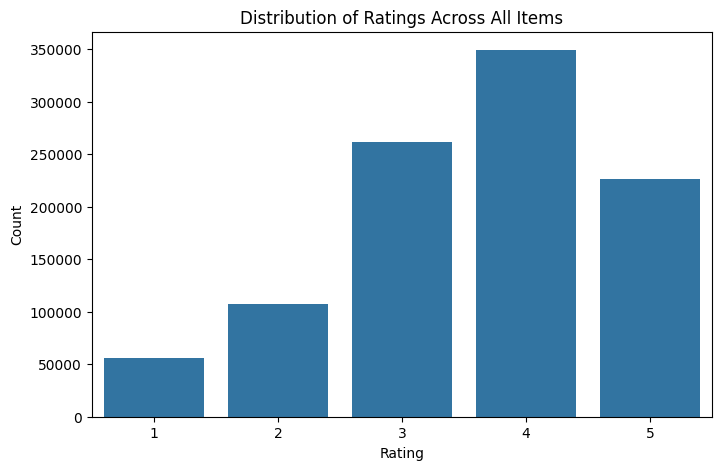

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings_df)
plt.title('Distribution of Ratings Across All Items')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Sparsity: 0.957353 (4.2647% de densidad)


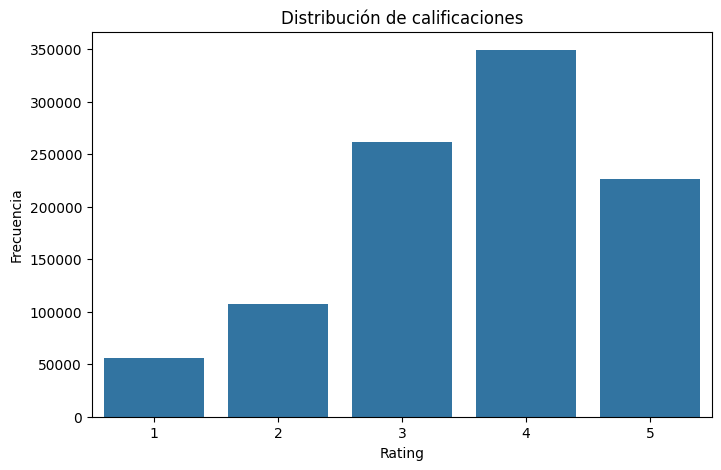

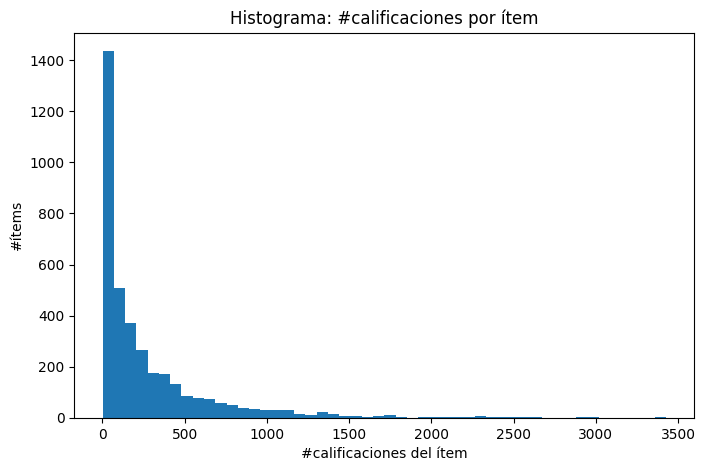

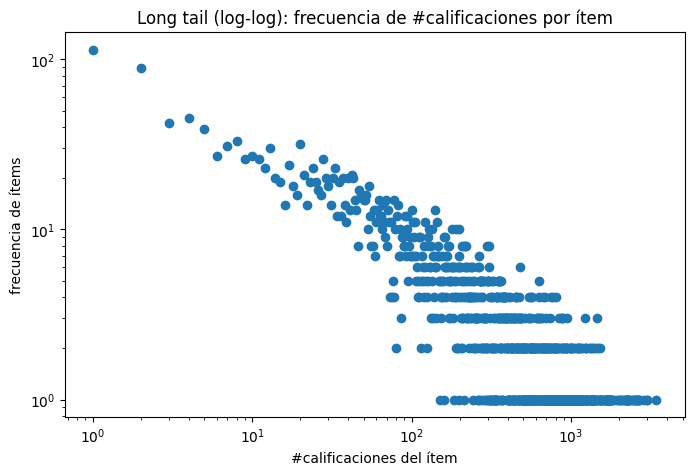

In [8]:
# Sparsity
num_users = users_df['user_id'].nunique()
num_movies = movies_df['item_id'].nunique()
num_ratings = ratings_df.shape[0]
sparsity = 1 - (num_ratings / (num_users * num_movies))
print(f"Sparsity: {sparsity:.6f} ({(1-sparsity)*100:.4f}% de densidad)")

# Distribución de ratings (ok tu countplot)
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings_df)
plt.title('Distribución de calificaciones')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

# Long tail de número de calificaciones por ítem (histograma)
item_ratings_count = ratings_df['item_id'].value_counts()
plt.figure(figsize=(8,5))
plt.hist(item_ratings_count, bins=50)
plt.title('Histograma: #calificaciones por ítem')
plt.xlabel('#calificaciones del ítem')
plt.ylabel('#ítems')
plt.show()

# Versión log-log (frecuencia vs. #ratings) para ver la cola larga
counts = item_ratings_count.value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.loglog(counts.index, counts.values, marker='o', linestyle='none')
plt.title('Long tail (log-log): frecuencia de #calificaciones por ítem')
plt.xlabel('#calificaciones del ítem')
plt.ylabel('frecuencia de ítems')
plt.show()


NameError: name 'x_ticks_interval' is not defined

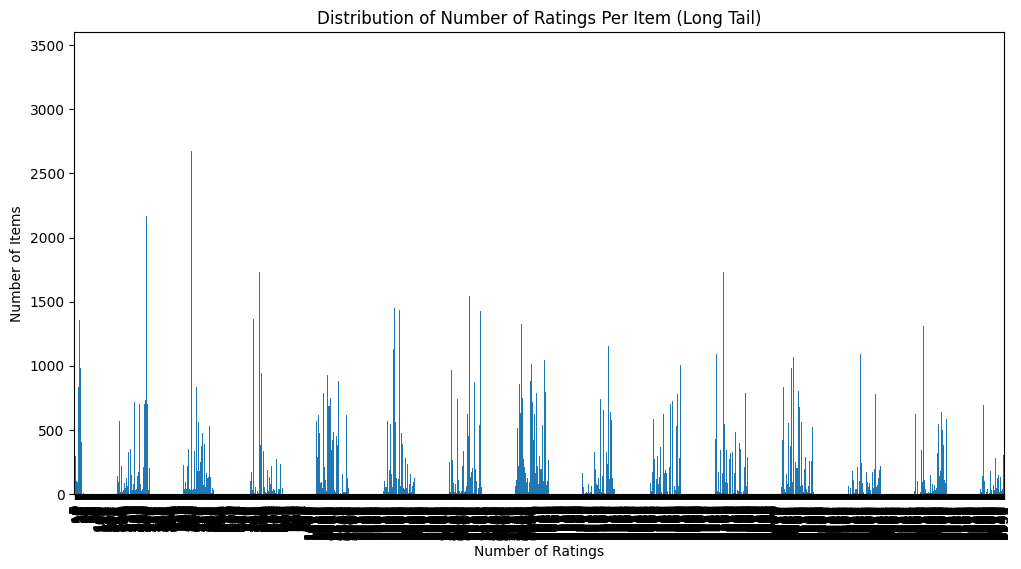

In [15]:

item_ratings_count = ratings_df['item_id'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
item_ratings_count.plot(kind='bar')
plt.title('Distribution of Number of Ratings Per Item (Long Tail)')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Items')

plt.xticks(range(0, len(item_ratings_count), x_ticks_interval), item_ratings_count.index[::x_ticks_interval], rotation=90)
plt.show()
